In [73]:
import pandas as pd
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from PIL import Image

In [142]:
df=pd.read_csv('Nyc.csv')


In [143]:
df.head()


tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0     01-06-2022 00:30      01-01-2021 00:36              1.0           2.10   
1     01-06-2022 00:51      01-01-2021 00:52              1.0           0.20   
2     01-06-2022 00:43      01-01-2021 01:11              1.0          14.70   
3     01-06-2022 00:15      01-01-2021 00:31              0.0          10.60   
4     01-06-2022 00:31      01-01-2021 00:48              1.0           4.94   

   PULocationID  DOLocationID payment_type  fare_amount  extra  mta_tax  \
0         142.0            43         Cash          8.0    3.0      0.5   
1         238.0           151         Cash          3.0    0.5      0.5   
2         132.0           165  Credit Card         42.0    0.5      0.5   
3         138.0           132  Credit Card         29.0    0.5      0.5   
4          68.0            33  Credit Card         16.5    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        0.00           0.0                    0.3         11.80   
1        0.00           0.0                    0.3          4.30   
2        8.65           0.0                    0.3         51.95   
3        6.05           0.0                    0.3         36.35   
4        4.06           0.0                    0.3         24.36   

   congestion_surcharge              PickUpLoc        DropOffLoc    Borough  \
0                   2.5    Lincoln Square East      Central Park  Manhattan   
1                   0.0  Upper West Side North  Manhattan Valley  Manhattan   
2                   0.0            JFK Airport           Midwood   Brooklyn   
3                   0.0      LaGuardia Airport       JFK Airport     Queens   
4                   2.5           East Chelsea  Brooklyn Heights   Brooklyn   

   Trip Duration                                  routes  
0       6.033333        Lincoln Square East-Central Park  
1       0.983333  Upper West Side North-Manhattan Valley  
2      27.600000                     JFK Airport-Midwood  
3      15.216667           LaGuardia Airport-JFK Airport  
4      16.533333           East Chelsea-Brooklyn Heights

In [144]:
df.shape

(1048575, 20)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   tpep_pickup_datetime   1048575 non-null  object 
 1   tpep_dropoff_datetime  1048575 non-null  object 
 2   passenger_count        1048572 non-null  float64
 3   trip_distance          1048572 non-null  float64
 4   PULocationID           1048573 non-null  float64
 5   DOLocationID           1048575 non-null  int64  
 6   payment_type           1048574 non-null  object 
 7   fare_amount            1048574 non-null  float64
 8   extra                  1048566 non-null  float64
 9   mta_tax                1048570 non-null  float64
 10  tip_amount             1048567 non-null  float64
 11  tolls_amount           1048559 non-null  float64
 12  improvement_surcharge  1048571 non-null  float64
 13  total_amount           1048573 non-null  float64
 14  congestion_surchar

In [146]:
df= df.dropna(how= 'any')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048513 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   tpep_pickup_datetime   1048513 non-null  object 
 1   tpep_dropoff_datetime  1048513 non-null  object 
 2   passenger_count        1048513 non-null  float64
 3   trip_distance          1048513 non-null  float64
 4   PULocationID           1048513 non-null  float64
 5   DOLocationID           1048513 non-null  int64  
 6   payment_type           1048513 non-null  object 
 7   fare_amount            1048513 non-null  float64
 8   extra                  1048513 non-null  float64
 9   mta_tax                1048513 non-null  float64
 10  tip_amount             1048513 non-null  float64
 11  tolls_amount           1048513 non-null  float64
 12  improvement_surcharge  1048513 non-null  float64
 13  total_amount           1048513 non-null  float64
 14  congestion_surchar

In [148]:
df.drop_duplicates(inplace = True)

In [149]:
df.shape

(1048496, 20)

# Feature Extraction

In [150]:
# Convert 'tpep_pickup_datetime' to datetime and extract the hour
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour

# Convert 'tpep_pickup_datetime' to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the weekday
df['day'] = df['tpep_pickup_datetime'].dt.day_name()


In [151]:
df['weekday'] = df['tpep_pickup_datetime'].dt.weekday

In [152]:
df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2022-01-06 00:30:00      01-01-2021 00:36              1.0           2.10   
1  2022-01-06 00:51:00      01-01-2021 00:52              1.0           0.20   
2  2022-01-06 00:43:00      01-01-2021 01:11              1.0          14.70   
3  2022-01-06 00:15:00      01-01-2021 00:31              0.0          10.60   
4  2022-01-06 00:31:00      01-01-2021 00:48              1.0           4.94   

   PULocationID  DOLocationID payment_type  fare_amount  extra  mta_tax  \
0         142.0            43         Cash          8.0    3.0      0.5   
1         238.0           151         Cash          3.0    0.5      0.5   
2         132.0           165  Credit Card         42.0    0.5      0.5   
3         138.0           132  Credit Card         29.0    0.5      0.5   
4          68.0            33  Credit Card         16.5    0.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        0.00           0.0                    0.3         11.80   
1        0.00           0.0                    0.3          4.30   
2        8.65           0.0                    0.3         51.95   
3        6.05           0.0                    0.3         36.35   
4        4.06           0.0                    0.3         24.36   

   congestion_surcharge              PickUpLoc        DropOffLoc    Borough  \
0                   2.5    Lincoln Square East      Central Park  Manhattan   
1                   0.0  Upper West Side North  Manhattan Valley  Manhattan   
2                   0.0            JFK Airport           Midwood   Brooklyn   
3                   0.0      LaGuardia Airport       JFK Airport     Queens   
4                   2.5           East Chelsea  Brooklyn Heights   Brooklyn   

   Trip Duration                                  routes  hour_of_day  \
0       6.033333        Lincoln Square East-Central Park            0   
1       0.983333  Upper West Side North-Manhattan Valley            0   
2      27.600000                     JFK Airport-Midwood            0   
3      15.216667           LaGuardia Airport-JFK Airport            0   
4      16.533333           East Chelsea-Brooklyn Heights            0   

        day  weekday  
0  Thursday        3  
1  Thursday        3  
2  Thursday        3  
3  Thursday        3  
4  Thursday        3

In [153]:
import pandas as pd

# Assuming df is your DataFrame and 'datetime_str' is the column with datetime information

# Check if conversion is needed
if pd.api.types.is_datetime64_any_dtype(df['tpep_pickup_datetime']):
    # Already in datetime format, no need for conversion
    df['datetime'] = df['tpep_pickup_datetime']
else:
    # Convert string to datetime
    df['datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format="%d-%m-%Y %H:%M")

# Function to categorize time of day
def get_part_of_day(dt_obj):
    hour = dt_obj.hour
    # ... rest of the function remains the same

# Apply the function
df['part_of_day'] = df['datetime'].apply(get_part_of_day)

In [154]:
df.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'PickUpLoc', 'DropOffLoc', 'Borough', 'Trip Duration', 'routes',
       'hour_of_day', 'day', 'weekday', 'datetime', 'part_of_day'],
      dtype='object')

### Analysis by Hour of the day

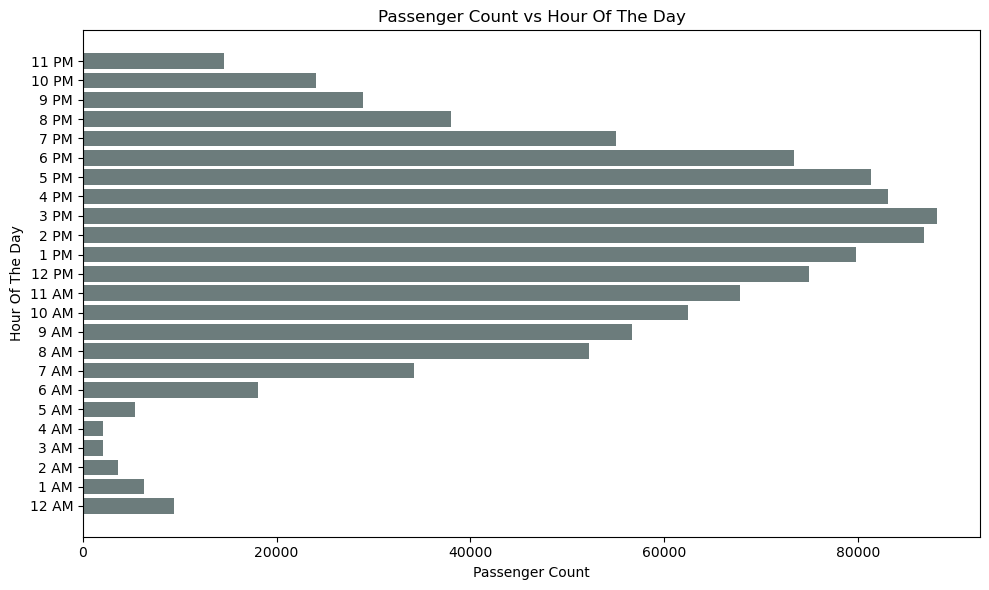

In [90]:
import pandas as pd
import matplotlib.pyplot as plt


# Aggregate data by hour of day. Replace 'size' with 'sum' if you have a passenger count column
hourly_counts = df.groupby('hour_of_day').size()
hour_labels = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
               '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']
hour_indices = range(24)
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(hourly_counts.index, hourly_counts.values, color='#6c7c7c')
plt.xlabel('Passenger Count')
plt.ylabel('Hour Of The Day')
plt.yticks(hour_indices, hour_labels)
plt.title('Passenger Count vs Hour Of The Day')
plt.tight_layout()
# Display the plot
plt.show()


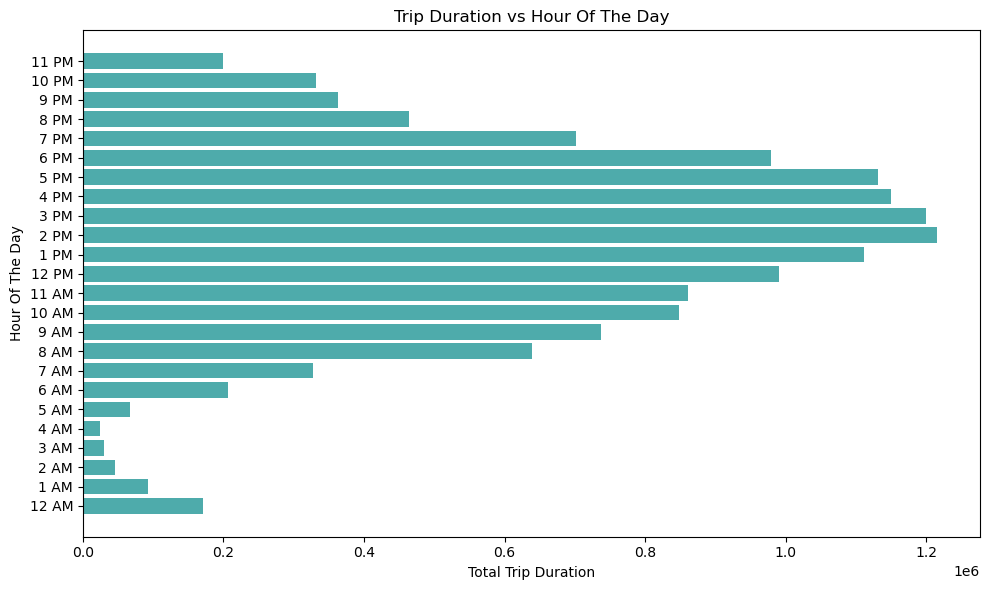

In [91]:
hourly_distance = df.groupby('hour_of_day')['Trip Duration'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(hourly_distance.index, hourly_distance.values, color='#4eabab')
plt.xlabel('Total Trip Duration')
plt.ylabel('Hour Of The Day')
plt.yticks(hour_indices, hour_labels)
plt.title('Trip Duration vs Hour Of The Day')
plt.tight_layout()
# Display the plot
plt.show()


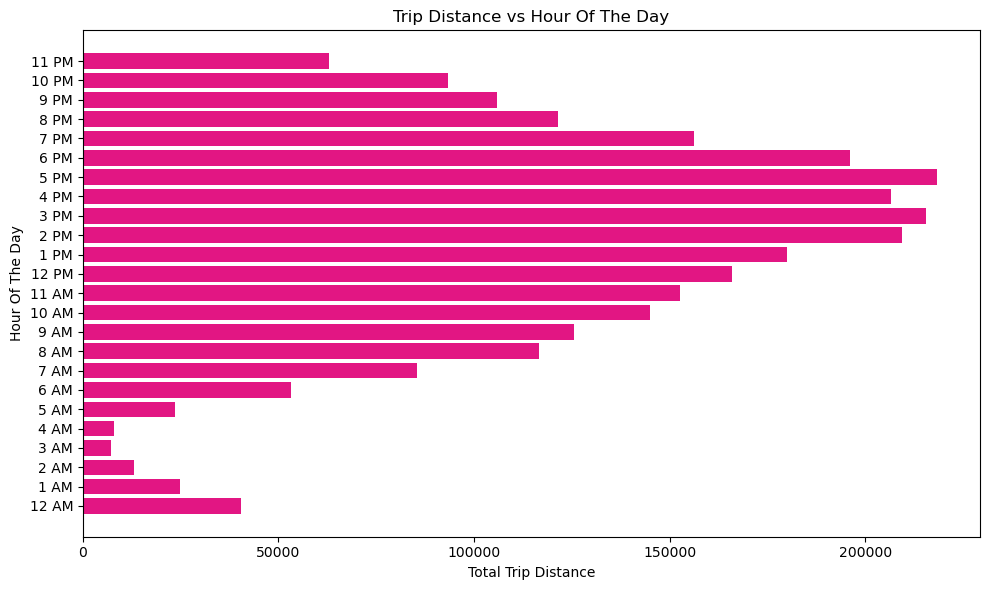

In [92]:
hourly_distance = df.groupby('hour_of_day')['trip_distance'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(hourly_distance.index, hourly_distance.values, color='#e21683')
plt.xlabel('Total Trip Distance')
plt.ylabel('Hour Of The Day')
plt.yticks(hour_indices, hour_labels)
plt.title('Trip Distance vs Hour Of The Day')
plt.tight_layout()
# Display the plot
plt.show()


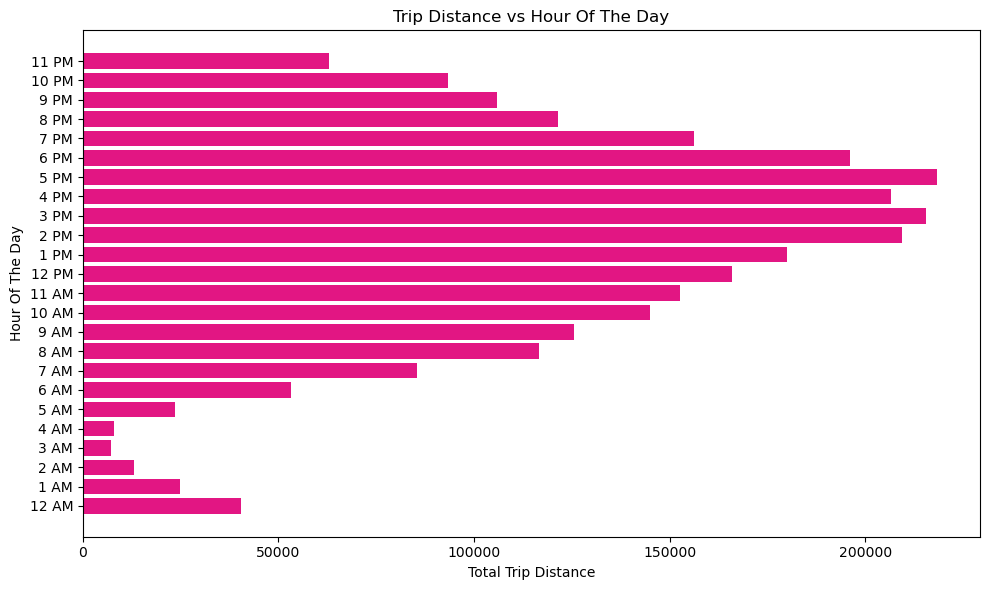

In [93]:
hourly_distance = df.groupby('hour_of_day')['trip_distance'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(hourly_distance.index, hourly_distance.values, color='#e21683')
plt.xlabel('Total Trip Distance')
plt.ylabel('Hour Of The Day')
plt.yticks(hour_indices, hour_labels)
plt.title('Trip Distance vs Hour Of The Day')
plt.tight_layout()
# Display the plot
plt.show()


### Data Visualization - Word Cloud

In [94]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [95]:
from wordcloud import WordCloud
import urllib

In [96]:
routes=df['routes'].values.tolist()
#len(routes)
routes = [x.replace(',', '').replace('\\', '') for x in routes]
routes


['Lincoln Square East-Central Park',
 'Upper West Side North-Manhattan Valley',
 'JFK Airport-Midwood',
 'LaGuardia Airport-JFK Airport',
 'East Chelsea-Brooklyn Heights',
 'Stuy Town/Peter Cooper Village-East Chelsea',
 'Flatiron-Carroll Gardens',
 'Fort Greene-Jackson Heights',
 'Yorkville West-Lincoln Square East',
 'Midtown South-Williamsburg (North Side)',
 'Williamsburg (North Side)-East Williamsburg',
 'LaGuardia Airport-Morningside Heights',
 'Lincoln Square East-Clinton West',
 'Clinton West-Lincoln Square East',
 'Lincoln Square East-Upper West Side South',
 'Upper West Side North-Morningside Heights',
 'Upper West Side South-Upper West Side North',
 'Manhattan Valley-Lincoln Square East',
 'Upper West Side North-Lincoln Square East',
 'West Village-Kips Bay',
 'Gramercy-Midtown North',
 'JFK Airport-Allerton/Pelham Gardens',
 'Clinton East-Sunnyside',
 'Upper West Side North-Midtown East',
 'Alphabet City-Central Park',
 'Clinton East-Central Harlem',
 'JFK Airport-Sunnyside

### Finding the top routes

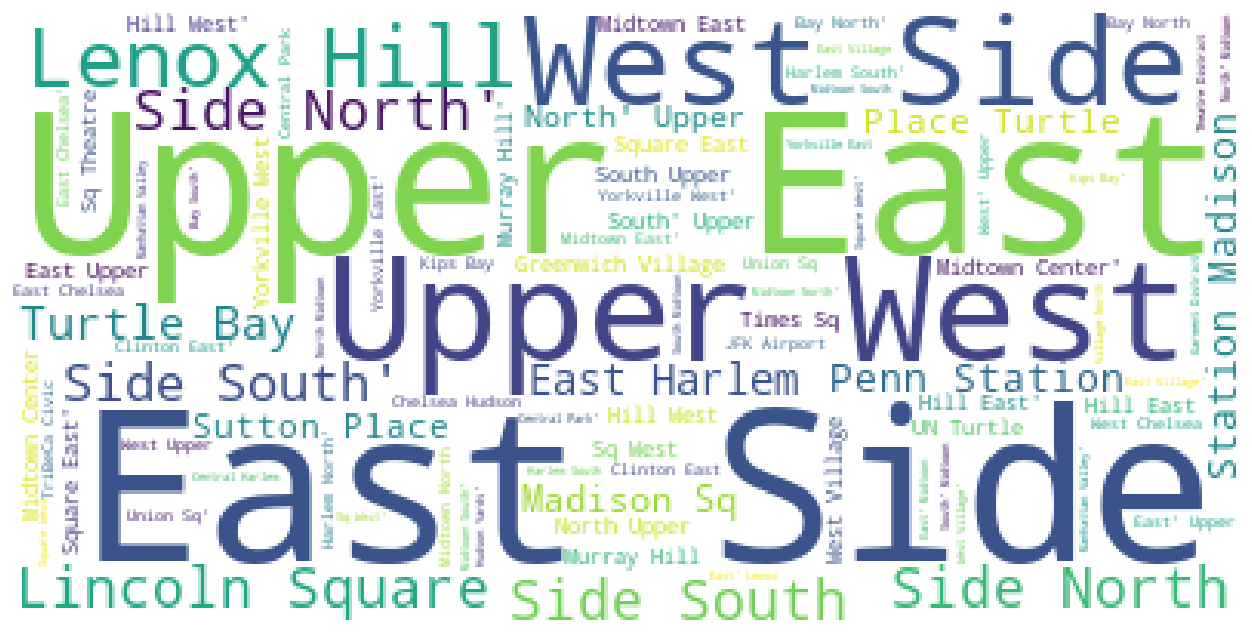

In [97]:
top_routes = WordCloud(background_color='white')
youth = top_routes.generate(str(routes))
fig=plt.figure(figsize=(16,8))
plt.imshow(youth)
plt.axis('off')
plt.show()

### Implementing wordcloud based on Pickup and Dropoff Locations and finding Top Busiest Locations 

In [98]:
pickup=df['PickUpLoc'].values.tolist()
dropoff=df['DropOffLoc'].values.tolist()

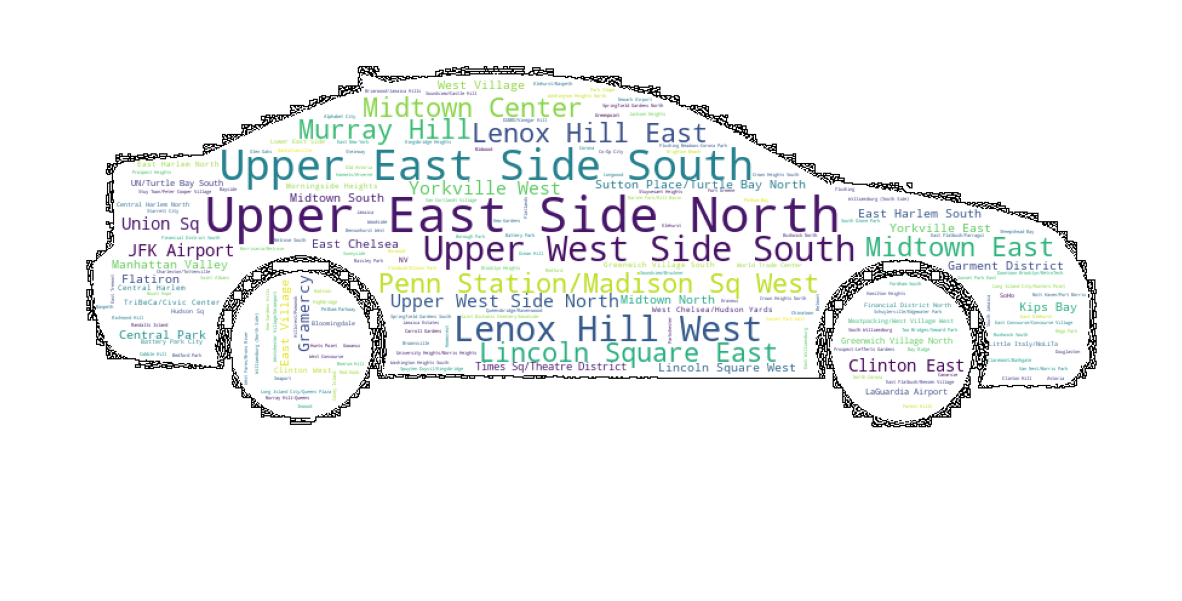

In [122]:
from collections import Counter
word_could_dict=Counter(pickup)
mask=np.array(Image.open("pickup.jpg"))
wordcloud = WordCloud(background_color='white',width = 1000, height = 500,
                      mask=mask,contour_color='black',contour_width=0.05).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

In [126]:
grouped_df = df.groupby('DropOffLoc').size()
df3 = grouped_df.reset_index(name='No_of_trips')
df3 = df3.sort_values(by ='No_of_trips', ascending = False).reset_index(drop = True)
df3

DropOffLoc  No_of_trips
0    Upper East Side North        59341
1    Upper East Side South        50824
2          Lenox Hill West        35699
3    Upper West Side South        33913
4    Upper West Side North        32766
..                     ...          ...
253    Green-Wood Cemetery            7
254          Broad Channel            5
255          Willets Point            3
256            Jamaica Bay            1
257                Oakwood            1

[258 rows x 2 columns]

In [127]:
grouped_df = df.groupby('PickUpLoc').size()
df3 = grouped_df.reset_index(name='No_of_trips')
df3 = df3.sort_values(by ='No_of_trips', ascending = False).reset_index(drop = True)
df3

PickUpLoc  No_of_trips
0                  Upper East Side North        59690
1                  Upper East Side South        59361
2                        Lenox Hill West        37398
3                  Upper West Side South        36618
4           Penn Station/Madison Sq West        35975
..                                   ...          ...
249  Breezy Point/Fort Tilden/Riis Beach            1
250                         Country Club            1
251              Arrochar/Fort Wadsworth            1
252               New Dorp/Midland Beach            1
253                        West Brighton            1

[254 rows x 2 columns]

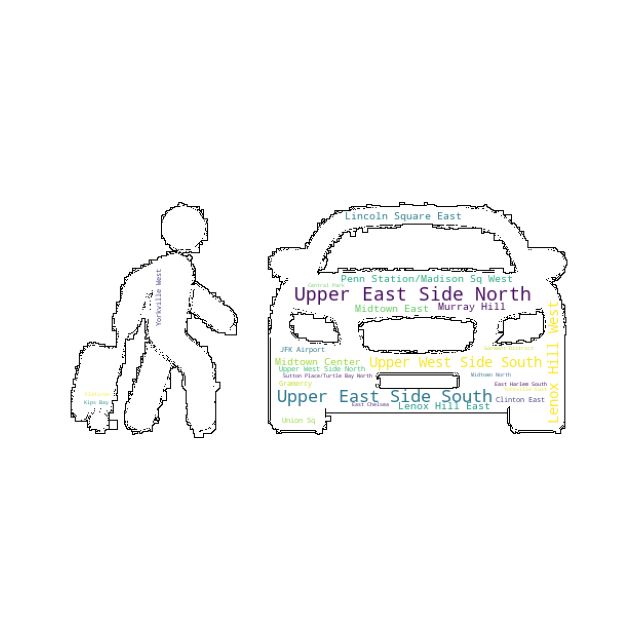

In [124]:
word_could_dict=Counter(pickup)
import numpy as np
from PIL import Image
stop = np.array(Image.open("pick.webp"))
wordcloud = WordCloud(background_color='white',width = 1000, height = 500,
                      mask=stop,max_words=25,contour_color='black',contour_width=0.01).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

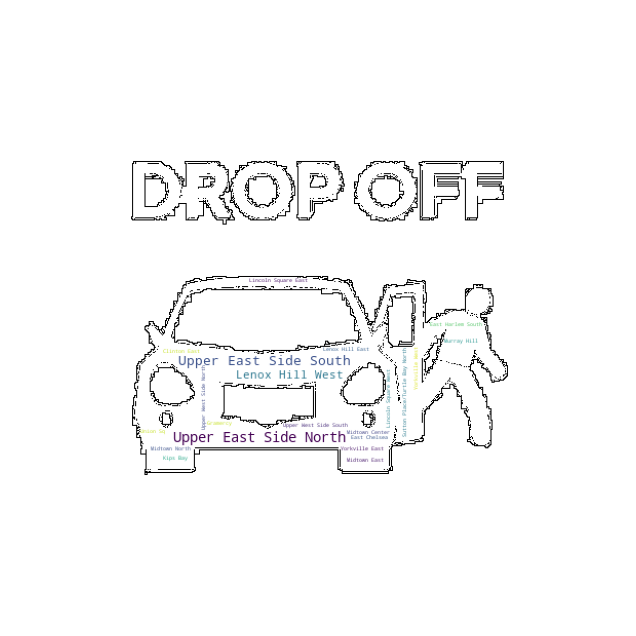

In [125]:
word_could_dict=Counter(dropoff)
import numpy as np
from PIL import Image
stop = np.array(Image.open("drop.webp"))
wordcloud = WordCloud(background_color='white',width = 1000, height = 500,
                      mask=stop,max_words=25,contour_color='black',contour_width=0.01).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

### Analysis by Payment mode

In [100]:
df.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'PickUpLoc', 'DropOffLoc', 'Borough', 'Trip Duration', 'routes',
       'hour_of_day', 'day', 'weekday', 'datetime', 'part_of_day'],
      dtype='object')

In [101]:
import plotly.express as px
avg_fare = df.groupby(['Borough', 'payment_type'])['fare_amount'].mean().reset_index()
fig = px.bar(avg_fare, x='Borough', y='fare_amount', color='payment_type', 
             barmode='group', title='Average Fare by Payment Type for Each Borough', color_discrete_sequence=['#ffd9c3', '#ffb3b9', '#ff8cb0','#e21683'])

fig.update_layout(
    plot_bgcolor='whitesmoke',  # Change 'lightgray' to the color you desire
    xaxis=dict(showgrid=True),  # Show grid lines for the x-axis
    
)
fig.show()


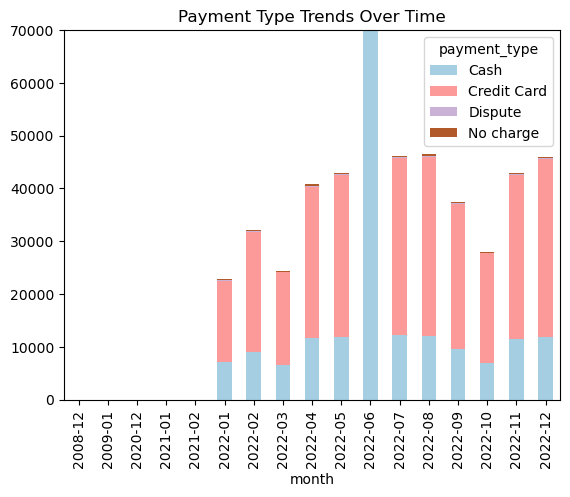

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df has already been defined and includes the 'tpep_pickup_datetime' and 'payment_type' columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['month'] = df['tpep_pickup_datetime'].dt.to_period('M')

# Group by month and payment type
payment_trends = df.groupby(['month', 'payment_type']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots()
payment_trends.plot(kind='bar', stacked=True, ax=ax, colormap='Paired')
ax.set_title('Payment Type Trends Over Time')

# Set the y-axis limits
ax.set_ylim([0, 70000]) # Replace your_max_limit with the maximum value you want to display

plt.show()


### Geospatial Map

In [103]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [104]:

import folium
print('Folium installed and imported!')

group_df = df.groupby('Borough').size()
df1 = group_df.reset_index(name='No_of_trips')
df1 = df1.sort_values(by ='No_of_trips', ascending = False).reset_index(drop = True)
df1

import json

nyc = 'nycgeo.json'
  
confirm=folium.Map(location=[40.7831,-73.9712],zoom_start=10)
confirm.choropleth(geo_data=nyc,data=df1,columns=['Borough','No_of_trips'],key_on='feature.properties.name',fill_color='Reds',
                   legend_name='County wise confirmed cases',
                   fill_opacity=0.7,line_opacity=0.8)
confirm

Folium installed and imported!


AttributeError: 'Map' object has no attribute 'choropleth'

### Horizontal bar chart of the number of trips per borough

Text(0.5, 0, 'Number of trips(x*10^6)')

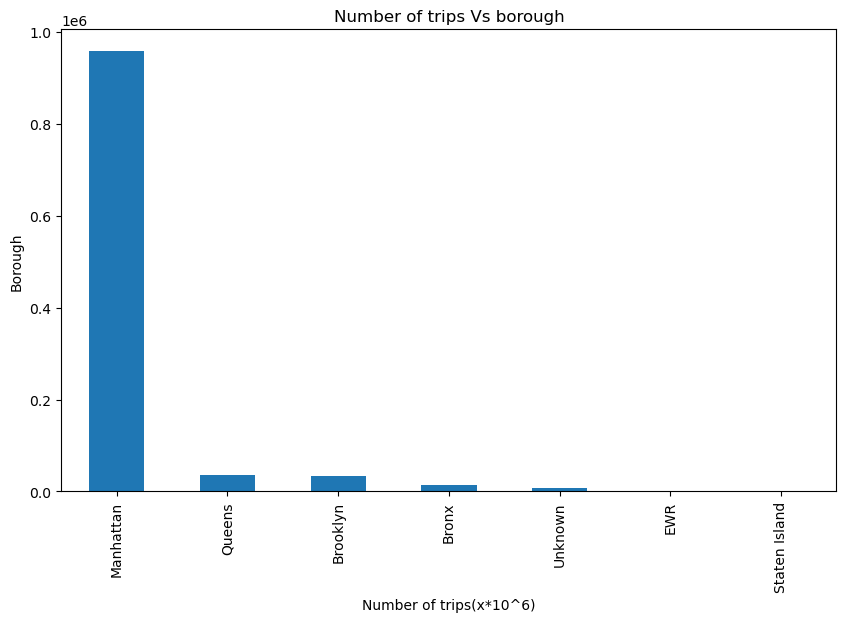

In [105]:
borough_counts = df['Borough'].value_counts()
borough_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of trips Vs borough")
plt.ylabel("Borough")
plt.xlabel("Number of trips(x*10^6)")

In [106]:
df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2022-01-06 00:30:00      01-01-2021 00:36              1.0           2.10   
1  2022-01-06 00:51:00      01-01-2021 00:52              1.0           0.20   
2  2022-01-06 00:43:00      01-01-2021 01:11              1.0          14.70   
3  2022-01-06 00:15:00      01-01-2021 00:31              0.0          10.60   
4  2022-01-06 00:31:00      01-01-2021 00:48              1.0           4.94   

   PULocationID  DOLocationID payment_type  fare_amount  extra  mta_tax  ...  \
0         142.0            43         Cash          8.0    3.0      0.5  ...   
1         238.0           151         Cash          3.0    0.5      0.5  ...   
2         132.0           165  Credit Card         42.0    0.5      0.5  ...   
3         138.0           132  Credit Card         29.0    0.5      0.5  ...   
4          68.0            33  Credit Card         16.5    0.5      0.5  ...   

         DropOffLoc    Borough  Trip Duration  \
0      Central Park  Manhattan       6.033333   
1  Manhattan Valley  Manhattan       0.983333   
2           Midwood   Brooklyn      27.600000   
3       JFK Airport     Queens      15.216667   
4  Brooklyn Heights   Brooklyn      16.533333   

                                   routes  hour_of_day       day weekday  \
0        Lincoln Square East-Central Park            0  Thursday       3   
1  Upper West Side North-Manhattan Valley            0  Thursday       3   
2                     JFK Airport-Midwood            0  Thursday       3   
3           LaGuardia Airport-JFK Airport            0  Thursday       3   
4           East Chelsea-Brooklyn Heights            0  Thursday       3   

             datetime  part_of_day    month  
0 2022-01-06 00:30:00         None  2022-01  
1 2022-01-06 00:51:00         None  2022-01  
2 2022-01-06 00:43:00         None  2022-01  
3 2022-01-06 00:15:00         None  2022-01  
4 2022-01-06 00:31:00         None  2022-01  

[5 rows x 26 columns]

In [107]:
df1=df.groupby('day')['passenger_count'].count().reset_index()
df1.iloc[:,1]

0    101954
1    138531
2    124393
3    188861
4    127004
5    181852
6    185901
Name: passenger_count, dtype: int64

In [108]:
df1

day  passenger_count
0     Friday           101954
1     Monday           138531
2   Saturday           124393
3     Sunday           188861
4   Thursday           127004
5    Tuesday           181852
6  Wednesday           185901

In [109]:
df1.columns

Index(['day', 'passenger_count'], dtype='object')

### Passenger Count by Day of Week

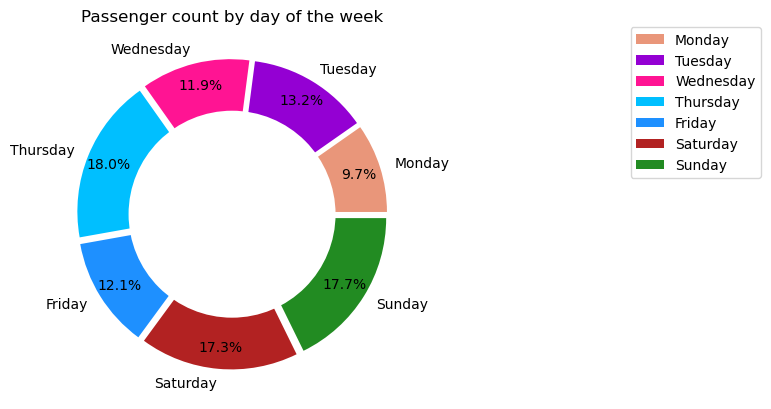

In [110]:
# Setting size in Chart based on 
# given values
sizes = df1.iloc[:,1]
  
# Setting labels for items in Chart
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
  
# colors
colors = ['#E9967A', '#9400D3', '#FF1493', '#00BFFF', '#1E90FF', '#B22222', '#228B22']

  
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05)
  
# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85, 
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Passenger count by day of the week')
  
# Add Legends
plt.legend(labels,bbox_to_anchor=(1.95,1.025),loc="upper right")

# Displaying Chart
plt.show()

In [111]:
df2=df.groupby('day')['total_amount'].sum().reset_index()
df2.iloc[:,1]

0    1697046.14
1    2192436.69
2    2003265.74
3    3146445.46
4    2110708.66
5    2939279.92
6    3041183.89
Name: total_amount, dtype: float64

In [112]:
df2.columns

Index(['day', 'total_amount'], dtype='object')

### Revenue by Day of the Week

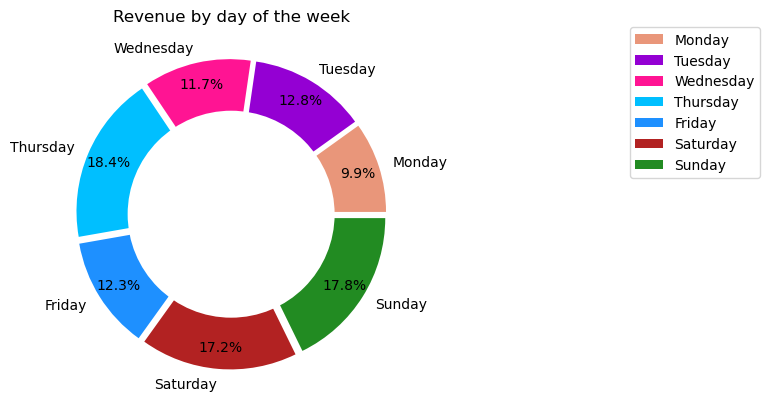

In [113]:
# Setting size in Chart based on 
# given values
sizes = df2.iloc[:,1]
  
# Setting labels for items in Chart
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
  
# colors
colors = ['#E9967A', '#9400D3', '#FF1493', '#00BFFF', '#1E90FF', '#B22222', '#228B22']

  
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05)
  
# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85, 
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Revenue by day of the week')
  
# Add Legends
plt.legend(labels,bbox_to_anchor=(1.95,1.025),loc="upper right")

# Displaying Chart
plt.show()

#### Passenger Count vs Fare Amount vs Tip Amount

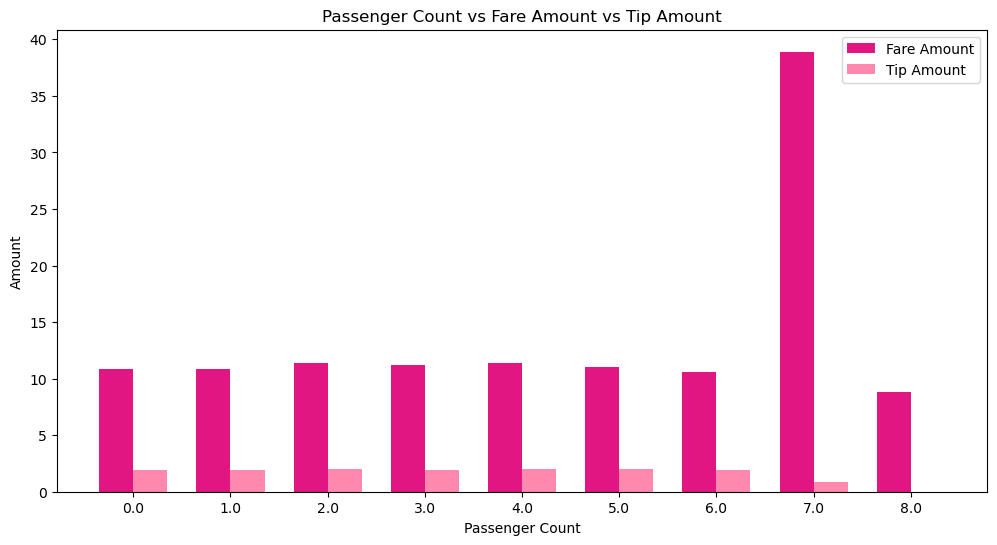

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a CSV file with columns passenger_count, fare_amount, and tip_amount
# Replace 'your_dataset.csv' with the actual file path
#df = pd.read_csv('your_dataset.csv')

# Group the data by passenger_count and calculate the mean fare_amount and tip_amount for each group
grouped_data = df.groupby('passenger_count')[['fare_amount', 'tip_amount']].mean().reset_index()

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
fare_color='#e21683'
tip_color='#ff89ae'

# Bar for fare_amount
bar1 = ax.bar(grouped_data['passenger_count'], grouped_data['fare_amount'], bar_width, label='Fare Amount',color=fare_color)

# Bar for tip_amount
bar2 = ax.bar(grouped_data['passenger_count'] + bar_width, grouped_data['tip_amount'], bar_width, label='Tip Amount',color=tip_color)

# Adding labels, title, and legend
ax.set_xlabel('Passenger Count')
ax.set_ylabel('Amount')
ax.set_title('Passenger Count vs Fare Amount vs Tip Amount')
ax.set_xticks(grouped_data['passenger_count'] + bar_width / 2)
ax.set_xticklabels(grouped_data['passenger_count'])
ax.legend()

# Display the plot
plt.show()


#### Trip Duration and Distance by Borough

/var/folders/q7/rt9c_s4s2kj7_tcm_17fzm5r0000gn/T/ipykernel_79206/4232336228.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



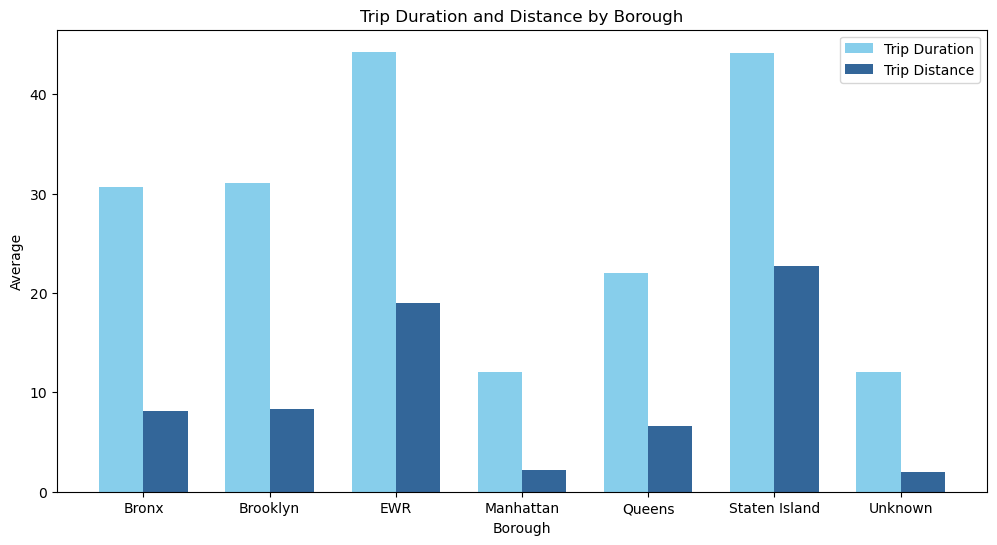

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = df.groupby('Borough').mean()[['Trip Duration', 'trip_distance']].reset_index()
plt.figure(figsize=(12, 6))
bar_width = 0.35

duration_color = '#87CEEB'
distance_color = '#336699'


index = range(len(grouped_data['Borough']))

plt.bar(index, grouped_data['Trip Duration'], bar_width, label='Trip Duration',color=duration_color)
plt.bar([i + bar_width for i in index], grouped_data['trip_distance'], bar_width, label='Trip Distance',color=distance_color)

plt.xlabel('Borough')
plt.ylabel('Average')
plt.title('Trip Duration and Distance by Borough')
plt.xticks([i + bar_width / 2 for i in index], grouped_data['Borough'])
plt.legend()

plt.show()


#### Trip Distance vs Fare Amount

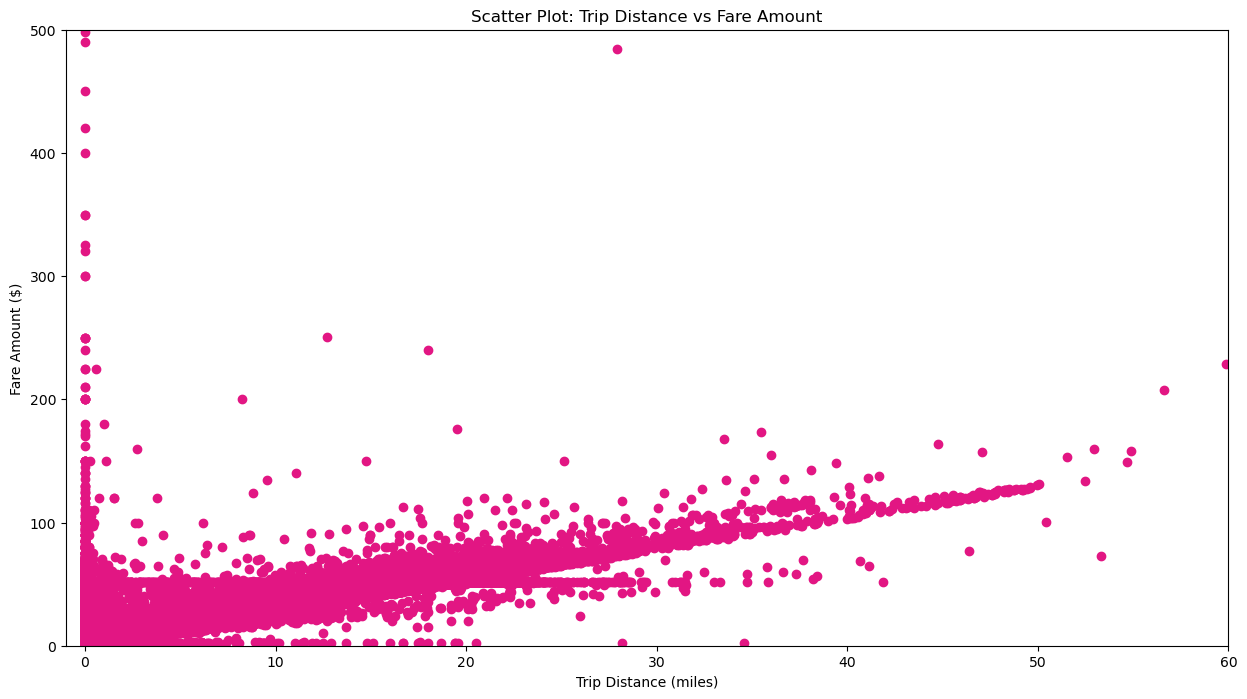

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'Trip Distance' and 'Fare Amount'
# Replace 'your_dataset.csv' with the actual path or name of your dataset file
#df = pd.read_csv('your_dataset.csv')

import pandas as pd

# Assuming your dataset is a DataFrame named 'df' and the column you want to filter is 'your_column'
df = df[df['fare_amount'] > 0]


plt.figure(figsize=(15, 8))
# Scatter plot
plt.scatter(df['trip_distance'], df['fare_amount'], color='#e21683', marker='o')

# Set labels and title
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Scatter Plot: Trip Distance vs Fare Amount')

plt.xlim(-1, 60)  
plt.ylim(0, 500)

# Show the plot
plt.show()


###  Corelation Heat Map

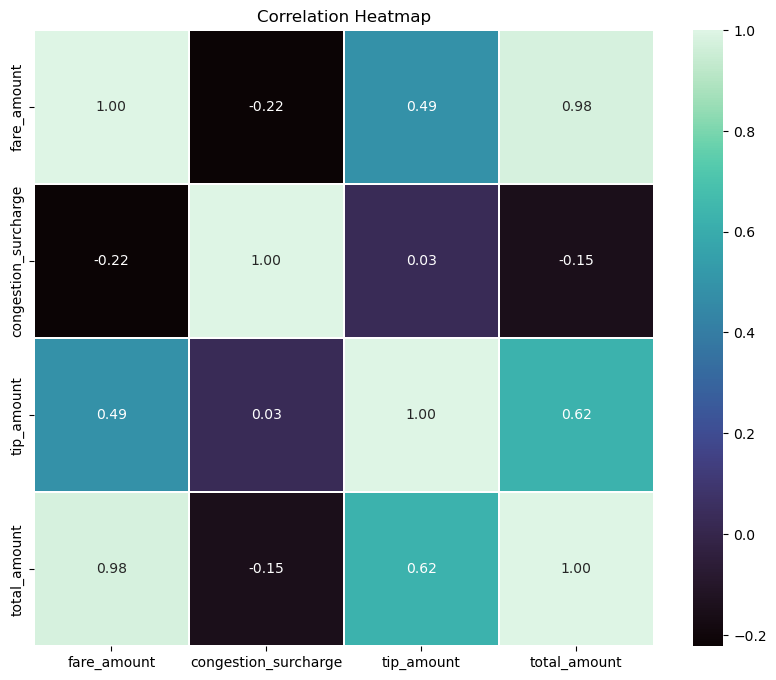

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns: fare_amount, congestion_surcharge, tip_amount, total_amount
# Example data (replace this with your actual data)


# Calculate the correlation matrix
correlation_matrix = df[['fare_amount', 'congestion_surcharge', 'tip_amount', 'total_amount']].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f", linewidths=.1)
plt.title("Correlation Heatmap")
plt.show()


PickUpLoc             DropOffLoc  Number of Trips
14601  Upper East Side South  Upper East Side North             9609
14407  Upper East Side North  Upper East Side South             8053
14948  Upper West Side South  Upper West Side North             4097
8063         Lenox Hill West  Upper East Side North             3911
14883  Upper West Side South    Lincoln Square East             3659
14284  Upper East Side North      East Harlem South             3367
14787  Upper West Side North  Upper West Side South             3302
16370         Yorkville West        Lenox Hill West             3295
16445         Yorkville West  Upper East Side North             3238
14330  Upper East Side North        Lenox Hill West             3194

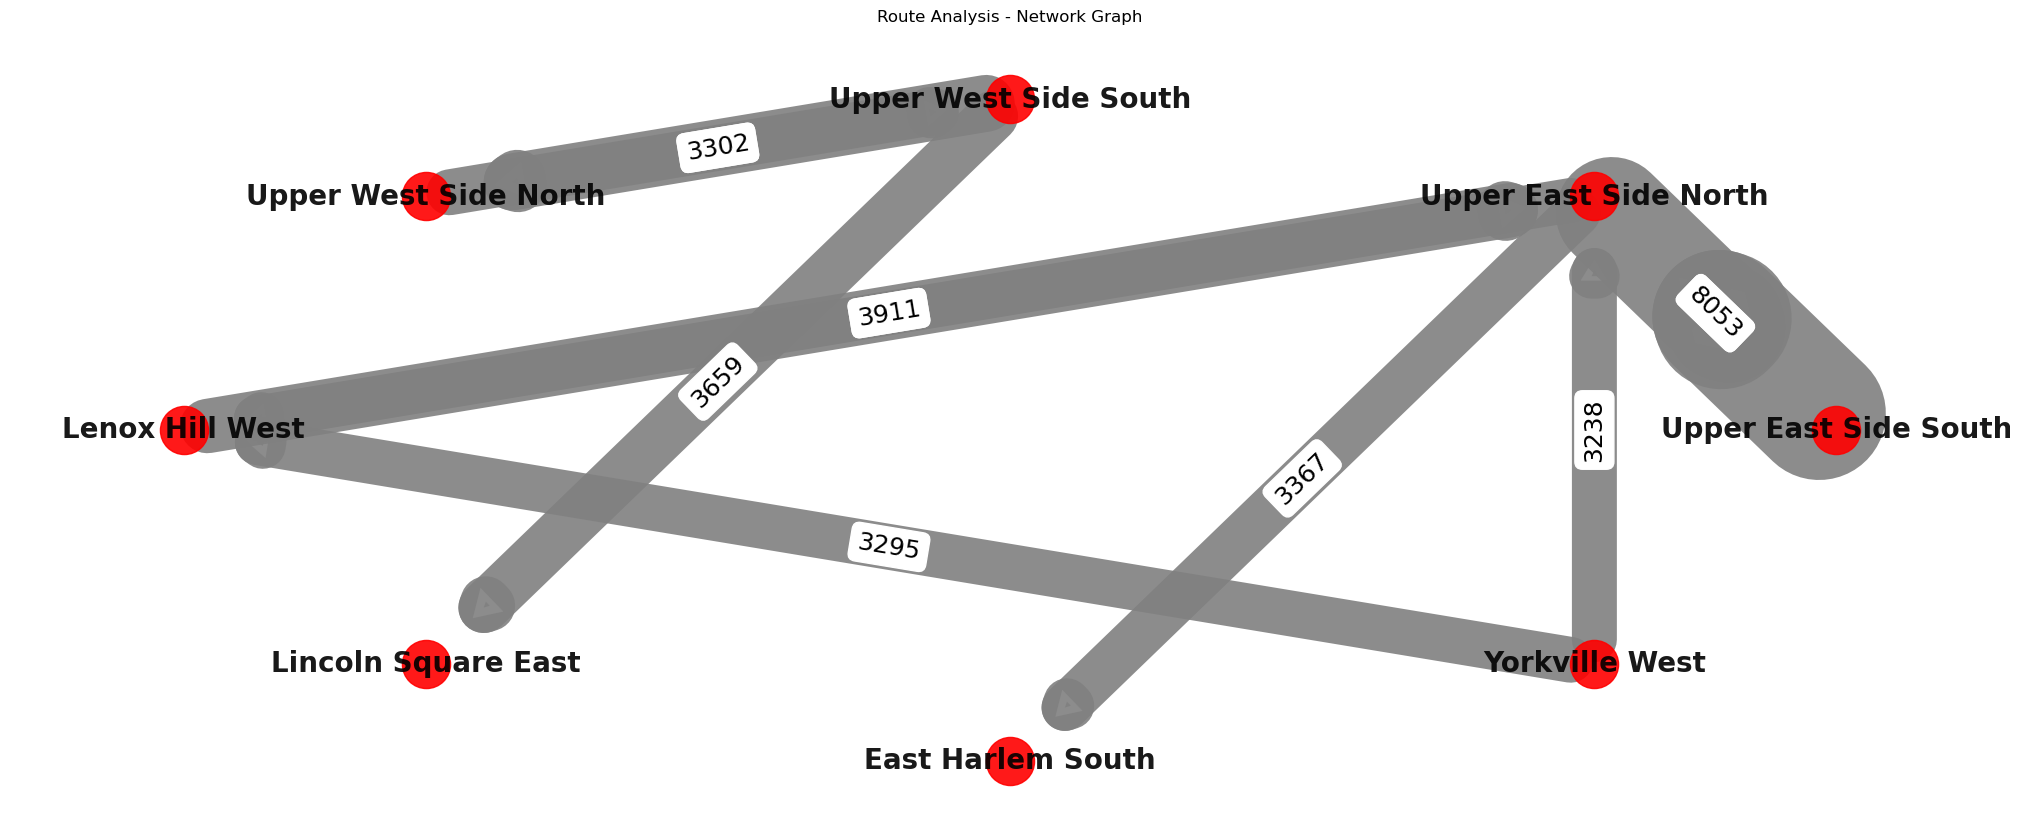

In [121]:
import pandas as pd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df=pd.read_csv('Nyc.csv')

# Group by pickup and drop-off locations and count the number of trips
route_counts = df.groupby(['PickUpLoc', 'DropOffLoc']).size().reset_index(name='Number of Trips')

sorted_route_counts = route_counts.sort_values(by='Number of Trips', ascending=False)

filtered_route_counts = sorted_route_counts[sorted_route_counts['PickUpLoc'] != sorted_route_counts['DropOffLoc']]

df_1=filtered_route_counts.head(10)
display(df_1)

# Assuming 'route_counts' is your DataFrame

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph with weights based on the number of trips
for index, row in df_1.iterrows():
    route = f"{row['PickUpLoc']} to {row['DropOffLoc']}"
    G.add_edge(row['PickUpLoc'], row['DropOffLoc'], weight=row['Number of Trips'])

# Draw the graph
plt.figure(figsize=(20, 8))

# Use a circular layout for better clarity
pos = nx.circular_layout(G)

# Adjust node and edge colors, as well as other visual properties
node_colors = 'red'
edge_colors = 'gray'
node_size = 1200
font_size = 20

nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=node_colors, font_size=font_size, font_color='black', font_weight='bold', edge_color=edge_colors, width=[d['weight'] / 100 for i, j, d in G.edges(data=True)], alpha=0.9)

# Add edge labels
edge_labels = {(i, j): d['weight'] for i, j, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=font_size - 2)

plt.title("Route Analysis - Network Graph")
plt.show()

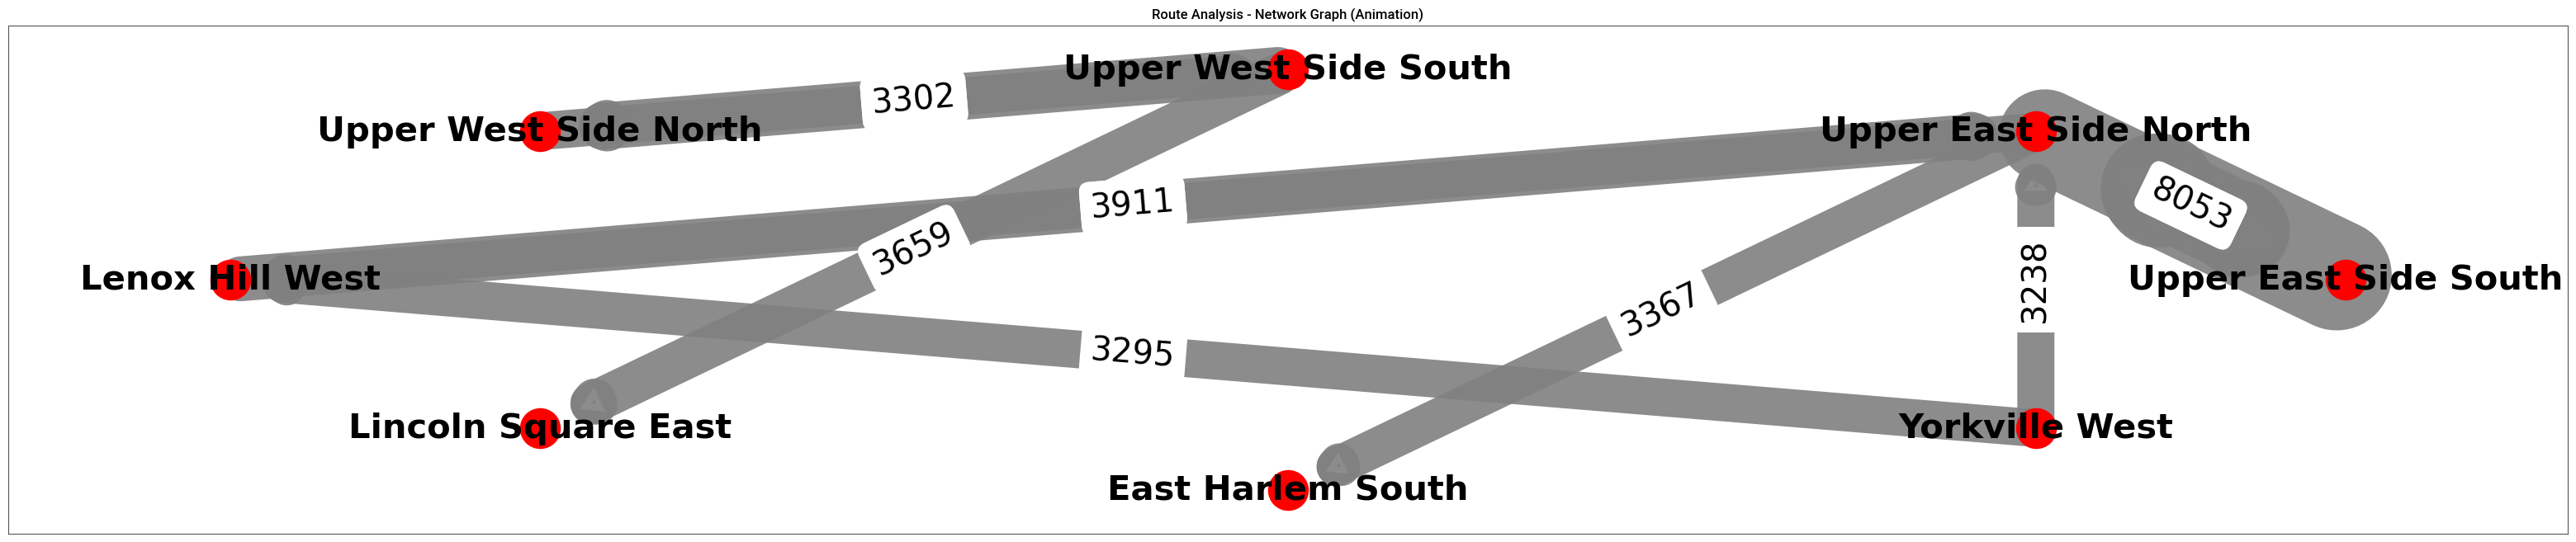

In [137]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
# Assuming 'route_counts' is your DataFrame
# Assuming df_1 is your DataFrame
 
# Create a directed graph
G = nx.DiGraph()
 
# Add edges to the graph with weights based on the number of trips
for index, row in df_1.iterrows():
    route = f"{row['PickUpLoc']} to {row['DropOffLoc']}"
    G.add_edge(row['PickUpLoc'], row['DropOffLoc'], weight=row['Number of Trips'])
 
# Create the figure and axis
fig, ax = plt.subplots(figsize=(40, 8))
 
# Use a circular layout for better clarity
pos = nx.circular_layout(G)
 
# Adjust node and edge colors, as well as other visual properties
node_colors = 'red'
edge_colors = 'gray'
node_size = 1200
font_size = 30
 
# Initialize empty plot elements
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_size)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=[d['weight'] / 100 for i, j, d in G.edges(data=True)], alpha=0.9)
labels = nx.draw_networkx_labels(G, pos, font_size=font_size, font_color='black', font_weight='bold')
 
# Add edge labels
edge_labels = {(i, j): d['weight'] for i, j, d in G.edges(data=True)}
edge_labels = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=font_size-1)
 
# Animation function
def update(frame):
    if frame < len(G.edges):
        # Only show edges up to the current frame
        edges = nx.draw_networkx_edges(G, pos, edgelist=list(G.edges)[:frame], edge_color=edge_colors, width=[d['weight'] / 100 for i, j, d in G.edges(data=True)], alpha=0.9)
 
# Animate the graph creation
animation = FuncAnimation(fig, update, frames=len(G.edges)+1, repeat=False)
 
plt.title("Route Analysis - Network Graph (Animation)")
plt.show()